In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configure visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
# Load the cleaned data
data_cleaned = pd.read_csv("../data/processed/cleaned_data.csv")

# Display basic information about the dataset
print("Dataset Shape:", data_cleaned.shape)
print("Dataset Info:")
data_cleaned.info()

# Display the first few rows of the dataset
data_cleaned.head()


Dataset Shape: (7043, 49)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code        

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


Missing Values:
Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type     

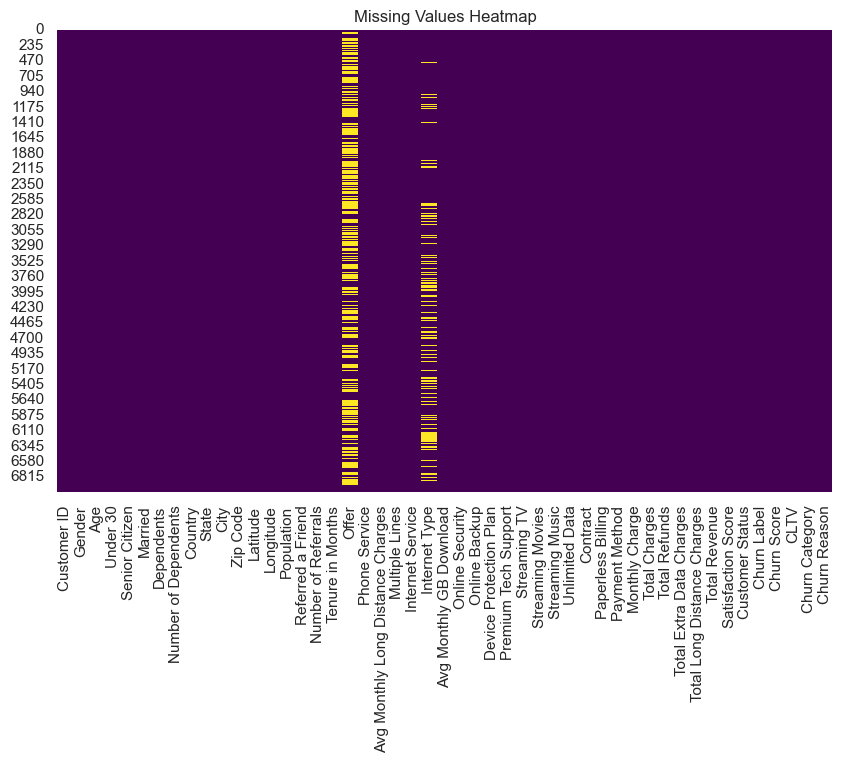

In [4]:
# Check for missing values
print("Missing Values:")
print(data_cleaned.isnull().sum())

# Visualize missing values (if any)
sns.heatmap(data_cleaned.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.savefig("../artifacts/missing_values_heatmap.png")
plt.show()


C:\Users\vivek\AppData\Local\Temp\ipykernel_14460\980320714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_cleaned['Churn Label'], palette="viridis")


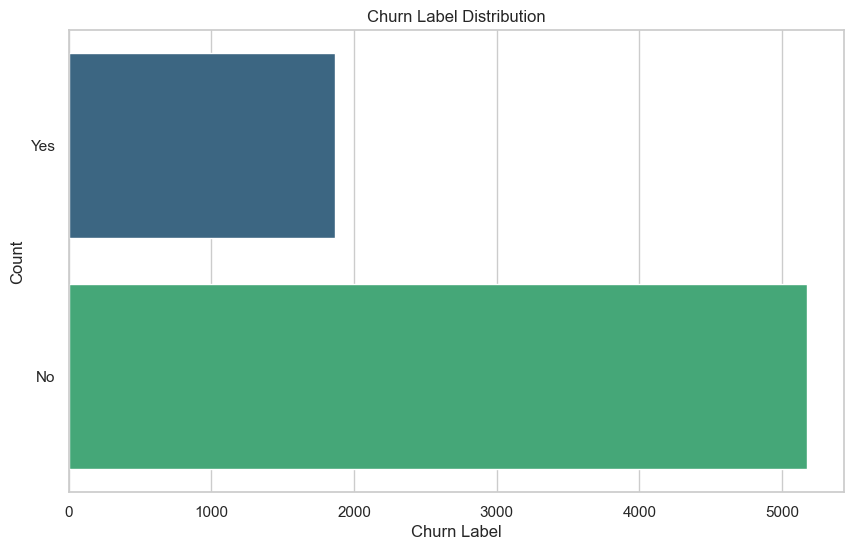

Churn Label Percentage Distribution:
Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [5]:
# Plot the distribution of the 'Churn Label' column
sns.countplot(data_cleaned['Churn Label'], palette="viridis")
plt.title("Churn Label Distribution")
plt.xlabel("Churn Label")
plt.ylabel("Count")
plt.savefig("../artifacts/churn_distribution.png")
plt.show()

# Calculate percentage distribution
churn_percentage = data_cleaned['Churn Label'].value_counts(normalize=True) * 100
print("Churn Label Percentage Distribution:")
print(churn_percentage)


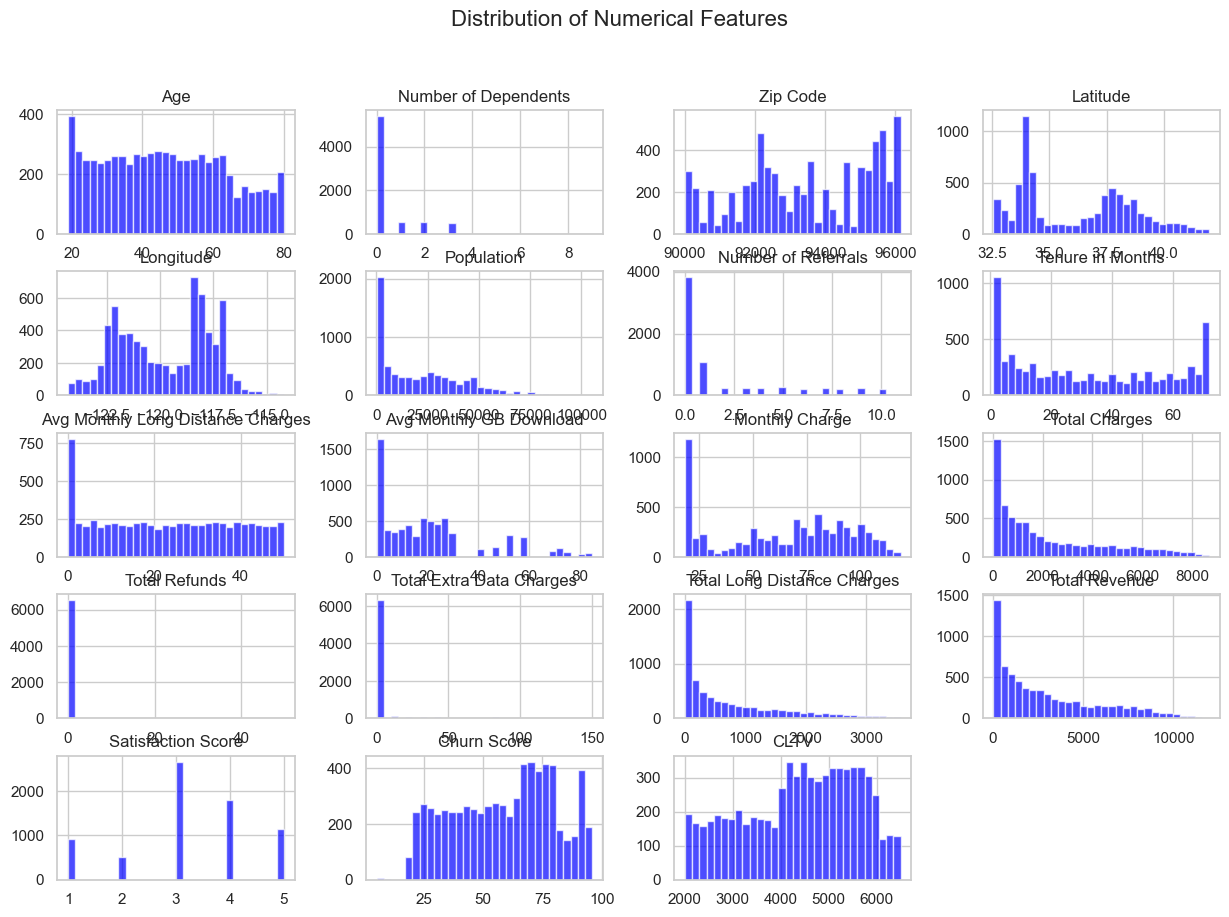

In [12]:
# Plot histograms for numerical columns
numeric_cols = data_cleaned.select_dtypes(include=["float64", "int64"]).columns
data_cleaned[numeric_cols].hist(bins=30, figsize=(15, 10), color="blue", alpha=0.7)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.savefig("../artifacts/numerical_features_distribution.png")
plt.show()

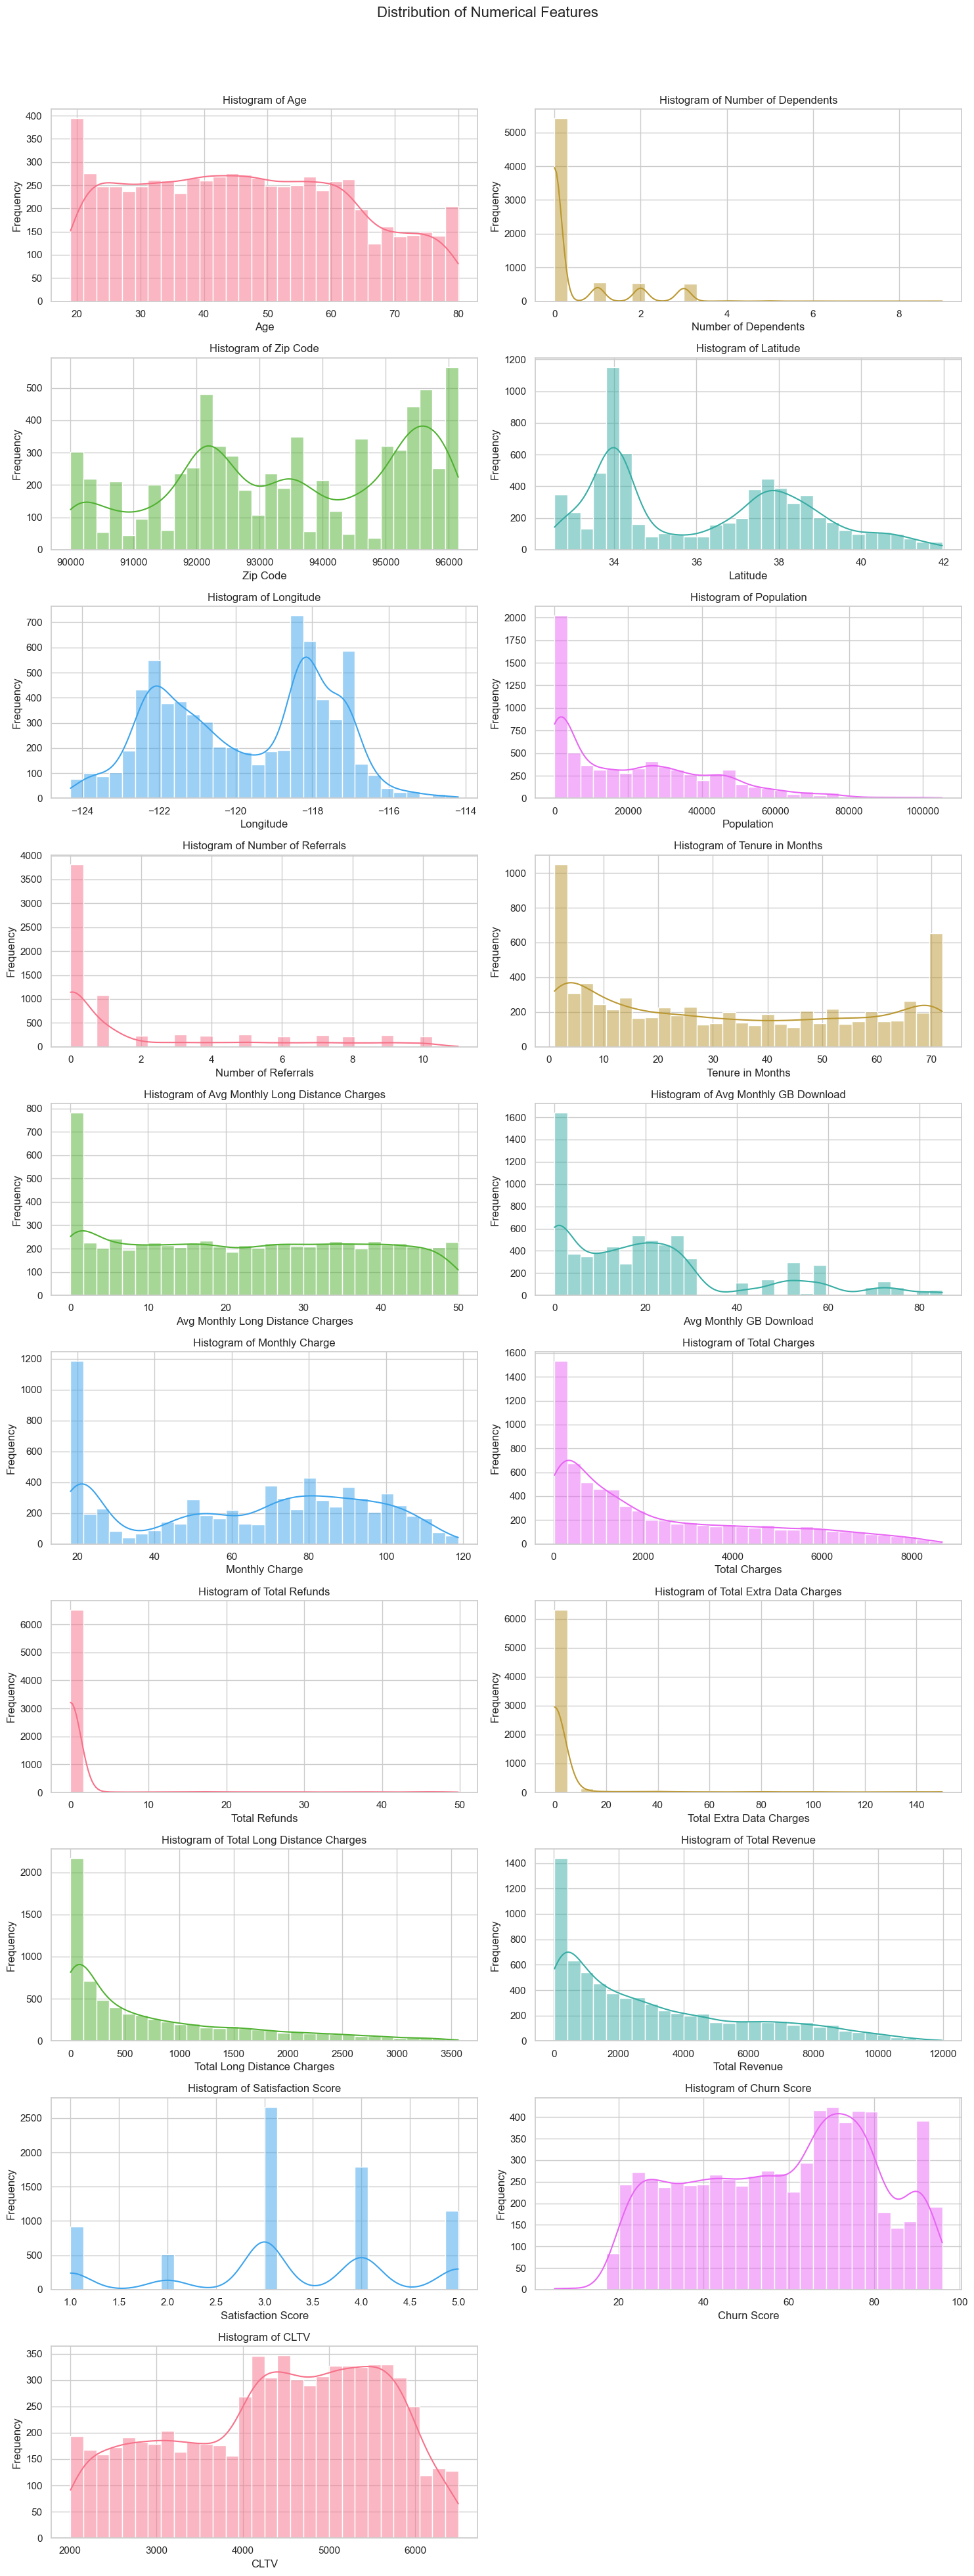

In [15]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Plot individual histograms for numerical columns
numeric_cols = data_cleaned.select_dtypes(include=["float64", "int64"]).columns
num_cols = len(numeric_cols)

# Set up grid size for subplots
rows = math.ceil(num_cols / 2)  # Arrange in 2 columns
fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 4))  # Adjust figure size dynamically
axes = axes.flatten()  # Flatten to access axes easily

# Plot each numerical column
for i, col in enumerate(numeric_cols):
    sns.histplot(data_cleaned[col], kde=True, bins=30,
                 color=sns.color_palette("husl")[i % len(sns.color_palette("husl"))],
                 ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete extra axes

# Adjust layout
fig.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.savefig("../artifacts/numerical_features_distribution.png")
plt.show()


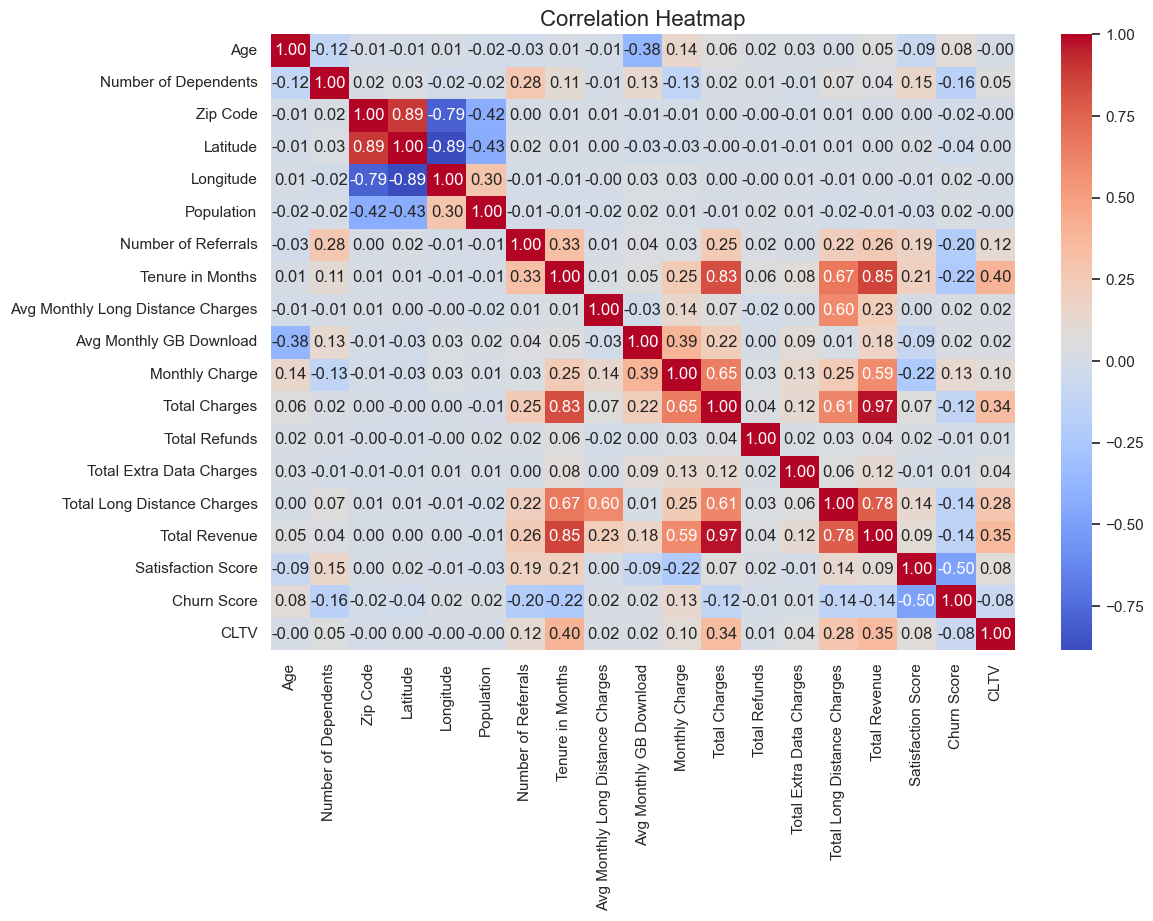

In [17]:
# Select only numeric columns
numeric_cols = data_cleaned.select_dtypes(include=["float64", "int64"])

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.savefig("../artifacts/correlation_heatmap.png")
plt.show()


In [22]:
print(data_cleaned.columns)


Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [23]:
data_cleaned.columns = data_cleaned.columns.str.strip()  # Strip spaces


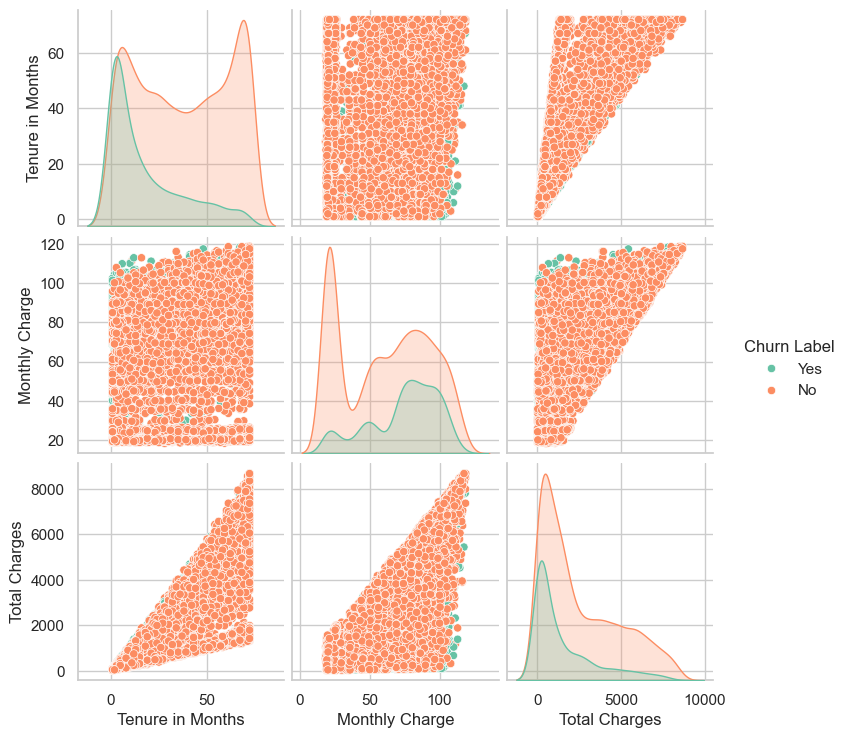

In [25]:
# Correct the column names in selected_features list
selected_features = ['Tenure in Months', 'Monthly Charge', 'Total Charges', 'Churn Label']

# Plot Pairplot for selected numerical features
if all(col in data_cleaned.columns for col in selected_features):
    sns.pairplot(data_cleaned[selected_features], hue="Churn Label", diag_kind="kde", palette="Set2")
    plt.savefig("../artifacts/pairplot.png")
    plt.show()
else:
    print("Pairplot could not be created because some required columns are missing.")


C:\Users\vivek\AppData\Local\Temp\ipykernel_14460\1332624280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x="Churn Label", y="Monthly Charge", palette="Set3")


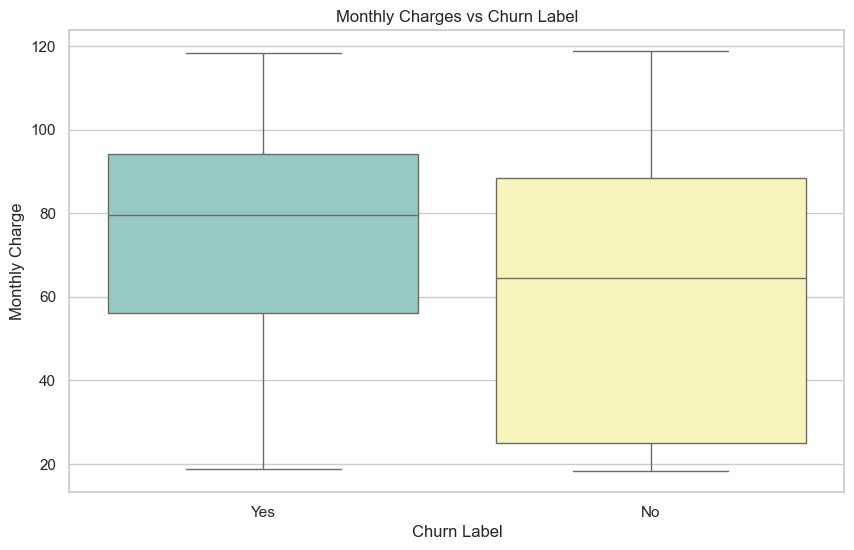

C:\Users\vivek\AppData\Local\Temp\ipykernel_14460\1332624280.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x="Churn Label", y="Total Charges", palette="Set3")


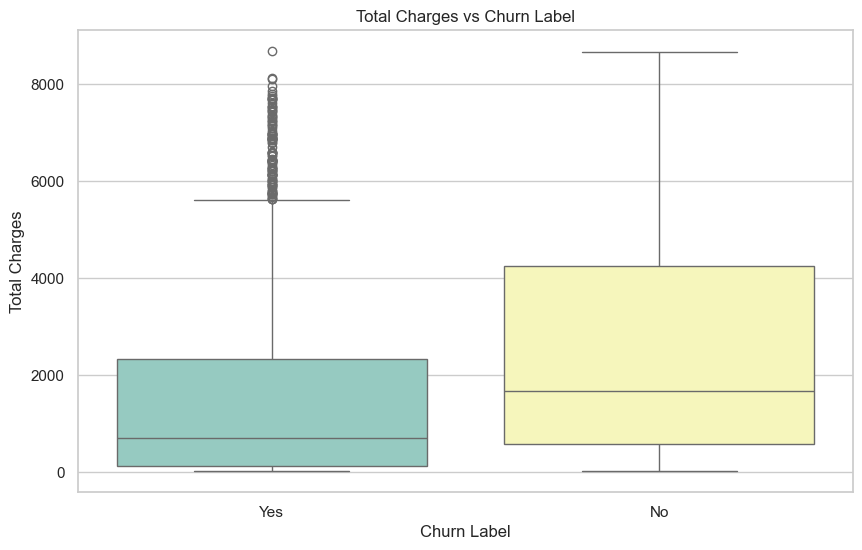

C:\Users\vivek\AppData\Local\Temp\ipykernel_14460\1332624280.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x="Gender", y="Monthly Charge", palette="Set3")


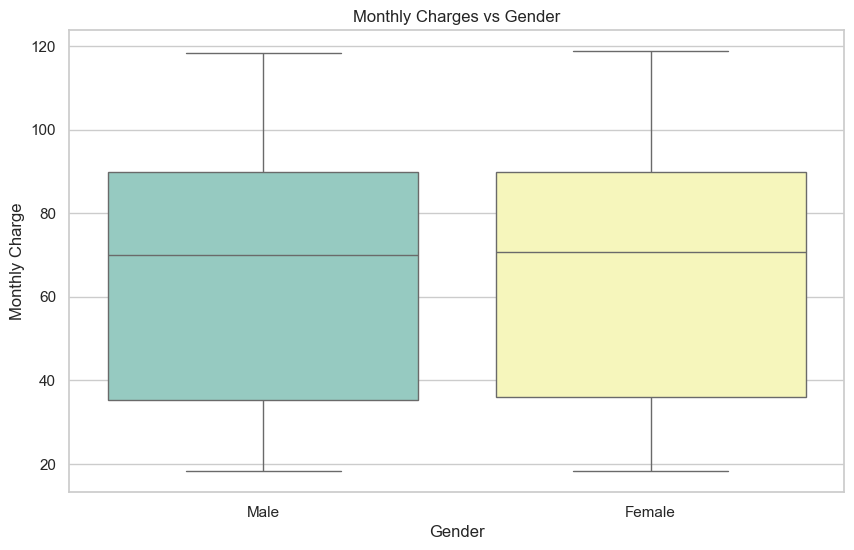

C:\Users\vivek\AppData\Local\Temp\ipykernel_14460\1332624280.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x="Contract", y="Monthly Charge", palette="Set3")


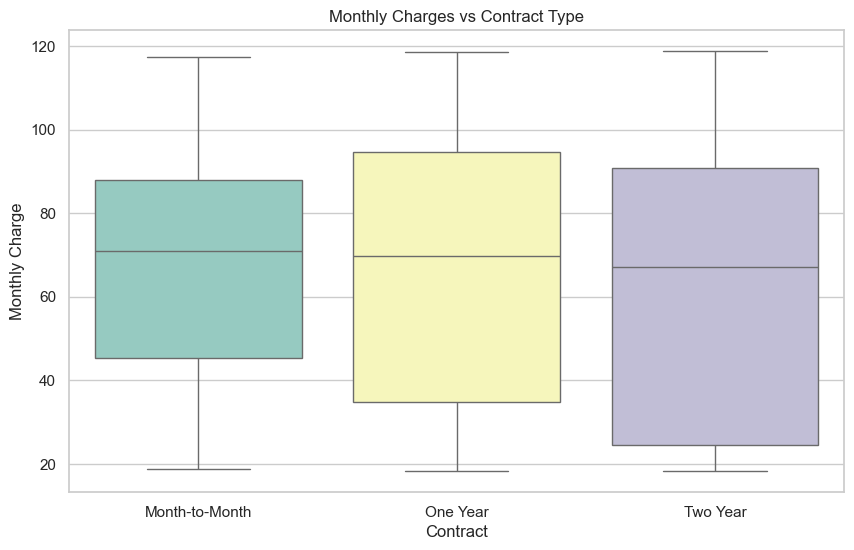

C:\Users\vivek\AppData\Local\Temp\ipykernel_14460\1332624280.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x="Payment Method", y="Monthly Charge", palette="Set3")


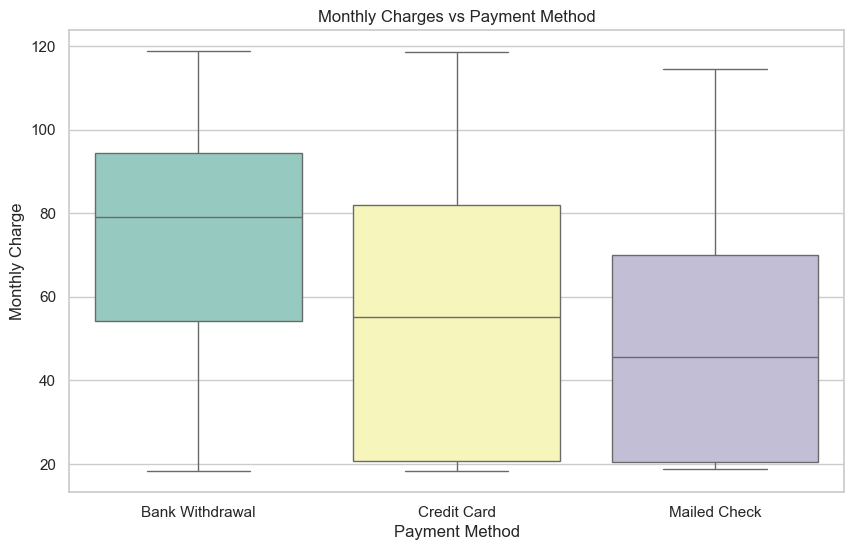

In [26]:
# Boxplot to understand the distribution of MonthlyCharges across Churn Labels
sns.boxplot(data=data_cleaned, x="Churn Label", y="Monthly Charge", palette="Set3")
plt.title("Monthly Charges vs Churn Label")
plt.savefig("../artifacts/boxplot_monthlycharges_churn.png")
plt.show()

# Boxplot for understanding the distribution of Total Charges across Churn Labels
sns.boxplot(data=data_cleaned, x="Churn Label", y="Total Charges", palette="Set3")
plt.title("Total Charges vs Churn Label")
plt.savefig("../artifacts/boxplot_totalcharges_churn.png")
plt.show()

# Boxplot for understanding the distribution of Monthly Charges across Gender
sns.boxplot(data=data_cleaned, x="Gender", y="Monthly Charge", palette="Set3")
plt.title("Monthly Charges vs Gender")
plt.savefig("../artifacts/boxplot_monthlycharges_gender.png")
plt.show()

# Boxplot for understanding the distribution of Monthly Charges across Contract types
sns.boxplot(data=data_cleaned, x="Contract", y="Monthly Charge", palette="Set3")
plt.title("Monthly Charges vs Contract Type")
plt.savefig("../artifacts/boxplot_monthlycharges_contract.png")
plt.show()

# Boxplot for understanding the distribution of Monthly Charges across Payment Methods
sns.boxplot(data=data_cleaned, x="Payment Method", y="Monthly Charge", palette="Set3")
plt.title("Monthly Charges vs Payment Method")
plt.savefig("../artifacts/boxplot_monthlycharges_payment_method.png")
plt.show()

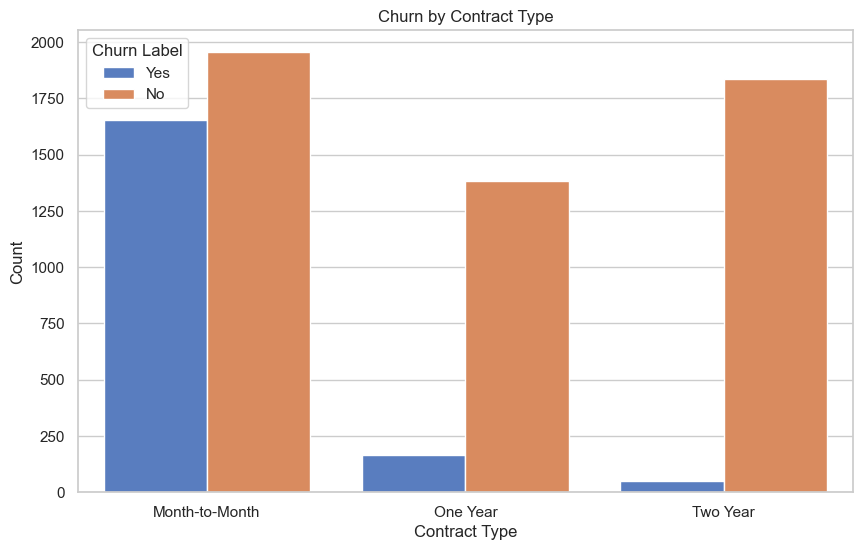

In [27]:
# Analyze churn by contract type
sns.countplot(data=data_cleaned, x="Contract", hue="Churn Label", palette="muted")
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.savefig("../artifacts/churn_by_contract.png")
plt.show()


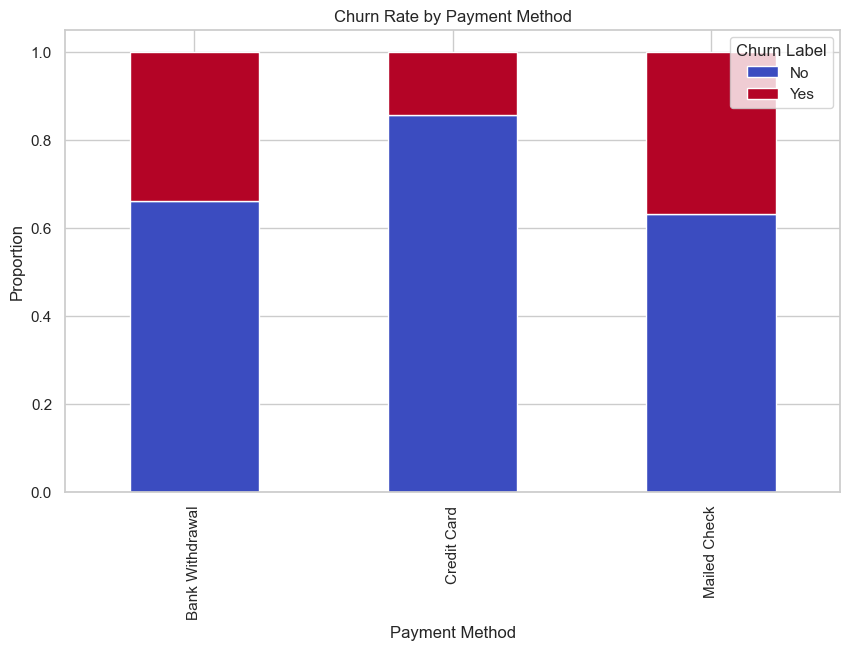

In [29]:
# Churn distribution by Payment Method
payment_churn = data_cleaned.groupby("Payment Method")["Churn Label"].value_counts(normalize=True).unstack()
payment_churn.plot(kind="bar", stacked=True, colormap="coolwarm")
plt.title("Churn Rate by Payment Method")
plt.ylabel("Proportion")
plt.savefig("../artifacts/churn_by_payment_method.png")
plt.show()


In [30]:
# Save processed data for modeling or additional feature engineering
data_cleaned.to_csv("../data/processed/final_cleaned_data.csv", index=False)
print("Processed data saved successfully!")


Processed data saved successfully!
